In [1]:
import numpy as np
import pandas as pd
import random
import xml.etree.ElementTree
import matplotlib
%matplotlib inline

In [2]:
bank_train_2016_xml = xml.etree.ElementTree.parse('../data/bank_train_2016.xml').getroot().getchildren()[1]
rows = []
for row_xml in bank_train_2016_xml.getchildren():
    row = []
    for cell in row_xml.getchildren():
        row.append(cell.text)
    rows.append(row)

/home/ilya/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  if __name__ == '__main__':
/home/ilya/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()
/home/ilya/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [3]:
bank_names = ['sberbank', 'vtb', 'gazprom', 'alfabank', 'bankmoskvy', 'raiffeisen', 'uralsib', 'rshb']

In [4]:
bank_train_2016 = pd.DataFrame(rows, columns=['id', 'twitid', 'date', 'text'] + bank_names)

In [5]:
bank_train_2016.head()

,id,twitid,date,text,sberbank,vtb,gazprom,alfabank,bankmoskvy,raiffeisen,uralsib,rshb
0,1,492367586156630000,1406224554,http://t.co/YEVHuvVGA1 Взять кредит тюмень аль...,NULL,NULL,NULL,0,NULL,NULL,NULL,NULL
1,2,492368160923070000,1406224691,Мнение о кредитной карте втб 24 http://t.co/SB...,NULL,0,NULL,NULL,NULL,NULL,NULL,NULL
2,3,492368608346260000,1406224798,«Райффайзенбанк»: Снижение ключевой ставки ЦБ ...,NULL,NULL,NULL,NULL,NULL,0,NULL,NULL
3,4,492371181946030000,1406225412,Современное состояние кредитного поведения в р...,0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
4,5,492374836564750000,1406226283,@sawik_shuster @YevhenS Главное чтоб банки СБЕ...,1,1,NULL,NULL,NULL,NULL,NULL,NULL


In [6]:
bank_train_2016.shape

(9392, 12)

In [7]:
for row in bank_train_2016.text[:20]:
    print row

http://t.co/YEVHuvVGA1 Взять кредит тюмень альфа банк
Мнение о кредитной карте втб 24 http://t.co/SBJTcsqjCg
«Райффайзенбанк»: Снижение ключевой ставки ЦБ на заседании в эту пятницу очень маловероятно
Современное состояние кредитного поведения в россии сбербанк http://t.co/EXAX01uR0h
@sawik_shuster @YevhenS Главное чтоб банки СБЕР и ВТБ!!!
http://t.co/Qr6JbSVTxY Оформить краткосрочный кредит оао банк москвы
Самый выгодный автокредит в втб 24 http://t.co/CDJ5P40x7g
Кредит иногородним в москве сбербанк http://t.co/AVlmacmlSf
Кредитный калькулятор россельхозбанк чита http://t.co/EqtmPota1G
http://t.co/h6r6GdBe4H Легко можно получить денежный кредит ы втб 24 банке
ДЕЛО -  На 1 млрд грн ушел в минус Райффайзен Банк Аваль и была докапитализирована украинская "дочка" ВТБ
Део нексия в кредит в альфа банке http://t.co/4nBxtHbczE
Россельхозбанк кредит стань фермером http://t.co/a7LU5KQT15
http://t.co/CuNsxVhAb0 Банк втб взять кредит 40000
@ShtirliZ_ @Zhukova_olga @winzard @tereshenkov обязательн

In [9]:
def uniform_sentiment(row):
    return np.unique(row).shape[0] == 2;
    
mask = bank_train_2016[bank_names].apply(uniform_sentiment, axis=1)
print bank_train_2016.shape[0] - bank_train_2016[mask].shape[0], 'сообщения из 9к+ имеют разную тональность для разных компаний.'

23 сообщения из 9к+ имеют разную тональность для разных компаний.


Поэтому можем не решать задачу object-oriented, а предсказывать тональность для всего твита.

In [10]:
def one_object(row):
    return row.value_counts()['NULL'] == len(bank_names) - 1;

mask = bank_train_2016[bank_names].apply(one_object, axis=1)
print bank_train_2016.shape[0] - bank_train_2016[mask].shape[0], 'сообщений имеют более одного объекта'

857 сообщений имеют более одного объекта


Вариант 1ый: берём только твиты с одним видом тональности и для твитов с упоминанием нескольких компаний оставляем лишь одну копию сообщения/лейбла.

In [11]:
def get_one_label(row):
    vals = list(np.unique(row))
    vals.remove('NULL')
    return vals[0] if len(vals) == 1 else np.nan

bank_train_2016_copy = bank_train_2016.copy()
bank_train_2016_copy['label'] = bank_train_2016_copy[bank_names].apply(get_one_label, axis=1)
bank_train_2016_copy = bank_train_2016_copy[['id', 'text', 'label']]
bank_train_2016_copy.head()

,id,text,label
0,1,http://t.co/YEVHuvVGA1 Взять кредит тюмень аль...,0
1,2,Мнение о кредитной карте втб 24 http://t.co/SB...,0
2,3,«Райффайзенбанк»: Снижение ключевой ставки ЦБ ...,0
3,4,Современное состояние кредитного поведения в р...,0
4,5,@sawik_shuster @YevhenS Главное чтоб банки СБЕ...,1


Вариант 2ой: для каждого упоминания компании в твите создаём отдельный семпл с сообщением и соответствующим лейблом

In [23]:
def get_all_labels(row):
    vals = row.values
    vals = vals[vals != 'NULL']
    return ' '.join(vals)

In [12]:
bank_train_2016_copy = bank_train_2016.copy()
bank_train_2016_copy['labels'] = bank_train_2016_copy[bank_names].apply(get_all_labels, axis=1)
bank_train_2016_copy = bank_train_2016_copy[['id', 'text', 'labels']]

lbs = bank_train_2016_copy['labels'].str.split(' ').apply(pd.Series, 1).stack()
lbs.index = lbs.index.droplevel(-1)
lbs.name = 'label'
del bank_train_2016_copy['labels']

bank_train_2016_copy = bank_train_2016_copy.join(lbs)
bank_train_2016_copy.head()

,id,text,label
0,1,http://t.co/YEVHuvVGA1 Взять кредит тюмень аль...,0
1,2,Мнение о кредитной карте втб 24 http://t.co/SB...,0
2,3,«Райффайзенбанк»: Снижение ключевой ставки ЦБ ...,0
3,4,Современное состояние кредитного поведения в р...,0
4,5,@sawik_shuster @YevhenS Главное чтоб банки СБЕ...,1


In [13]:
print bank_train_2016_copy.shape
bank_train_2016_copy.dropna(inplace=True)
print bank_train_2016_copy.shape

(10725, 3)
(10725, 3)


Соотношение классов:

In [14]:
bank_train_2016_copy.label.value_counts()

0     7158
-1    2807
1      760
Name: label, dtype: int64

Распределение длин сообщений в символах.

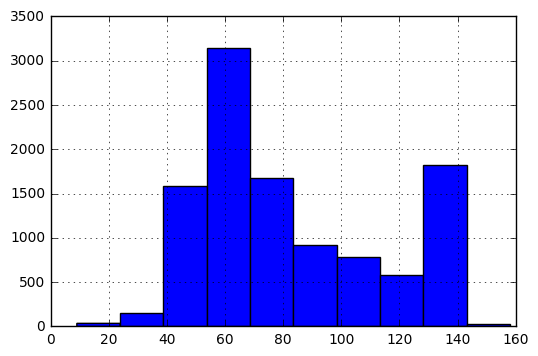

In [15]:
bank_train_2016_copy.text.apply(len).hist()

Распределение длин сообщений в словах.

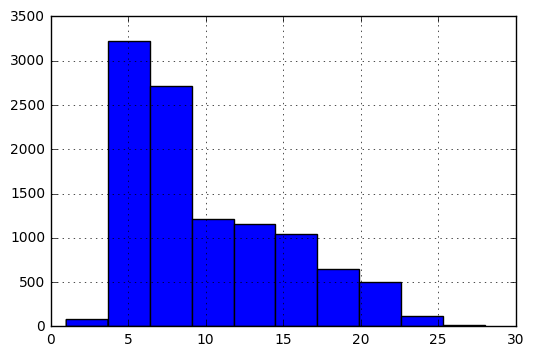

In [16]:
bank_train_2016_copy.text.apply(lambda s: len(s.split())).hist()

Сохраняем предобработанную выборку.

In [17]:
bank_train_2016_copy.to_csv('../data/bank_train.csv', sep='\t', index=False, encoding='utf-8')

---

Проведём аналогичную предобработку и для тестовой выборки.

In [19]:
bank_test_2016_xml = xml.etree.ElementTree.parse('../data/banks_test_etalon.xml').getroot().getchildren()[1]
rows = []
for row_xml in bank_test_2016_xml.getchildren():
    row = []
    for cell in row_xml.getchildren():
        row.append(cell.text)
    rows.append(row)

/home/ilya/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  if __name__ == '__main__':
/home/ilya/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()
/home/ilya/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [20]:
bank_test_2016 = pd.DataFrame(rows, columns=['id', 'twitid', 'date', 'text'] + bank_names)

In [21]:
bank_test_2016.head()

,id,twitid,date,text,sberbank,vtb,gazprom,alfabank,bankmoskvy,raiffeisen,uralsib,rshb
0,1,615732011572050000,1435636925,#Автокредит в россельхозбанк в череповце,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0
1,2,615732055876480000,1435636936,RT @thomasabiloxuz: http://t.co/GTfMwSQQ2c #Кр...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0
2,3,615732615576970000,1435637069,#Автокредит в россельхозбанк 2012 http://t.co/...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0
3,4,615737106367930000,1435638140,RT @ronaldisogacoq: #Кредитные карты россельхо...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0
4,5,615737591619540000,1435638256,RT @anthonyogihulaf: #Кредиты в россельхозбанк...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0


In [22]:
bank_test_2016.shape

(3313, 12)

In [24]:
bank_test_2016_copy = bank_test_2016.copy()
bank_test_2016_copy['labels'] = bank_test_2016_copy[bank_names].apply(get_all_labels, axis=1)
bank_test_2016_copy = bank_test_2016_copy[['id', 'text', 'labels']]

lbs = bank_test_2016_copy['labels'].str.split(' ').apply(pd.Series, 1).stack()
lbs.index = lbs.index.droplevel(-1)
lbs.name = 'label'
del bank_test_2016_copy['labels']

bank_test_2016_copy = bank_test_2016_copy.join(lbs)
bank_test_2016_copy.head()

,id,text,label
0,1,#Автокредит в россельхозбанк в череповце,0
1,2,RT @thomasabiloxuz: http://t.co/GTfMwSQQ2c #Кр...,0
2,3,#Автокредит в россельхозбанк 2012 http://t.co/...,0
3,4,RT @ronaldisogacoq: #Кредитные карты россельхо...,0
4,5,RT @anthonyogihulaf: #Кредиты в россельхозбанк...,0


In [25]:
print bank_test_2016_copy.shape
bank_test_2016_copy.dropna(inplace=True)
print bank_test_2016_copy.shape

(3418, 3)
(3418, 3)


In [26]:
bank_test_2016_copy.label.value_counts()

0     2316
-1     784
1      318
Name: label, dtype: int64

In [27]:
bank_test_2016_copy.to_csv('../data/bank_test.csv', sep='\t', index=False, encoding='utf-8')